#

In [1]:
%load_ext autoreload
%autoreload 2

from strategies.registry import STRATEGIES

# from trading_system.system_development.strategies.trend_pullback_v1.run_backtest import run_backtest_for_default_universe
# from trading_system.system_development.strategies.trend_pullback_v1.config import StrategyParams


=== Running backtest for ^GSPC ===

Signal counts for ^GSPC:
Signal
0    924
1     91
Name: count, dtype: int64

Exit breakdown for ^GSPC:
  All trades       :   44 trades, avg holding   0.48 days
  stop          :   16 trades, avg holding   0.74 days
  trend_exit    :   25 trades, avg holding   0.20 days
  tp            :    3 trades, avg holding   1.49 days


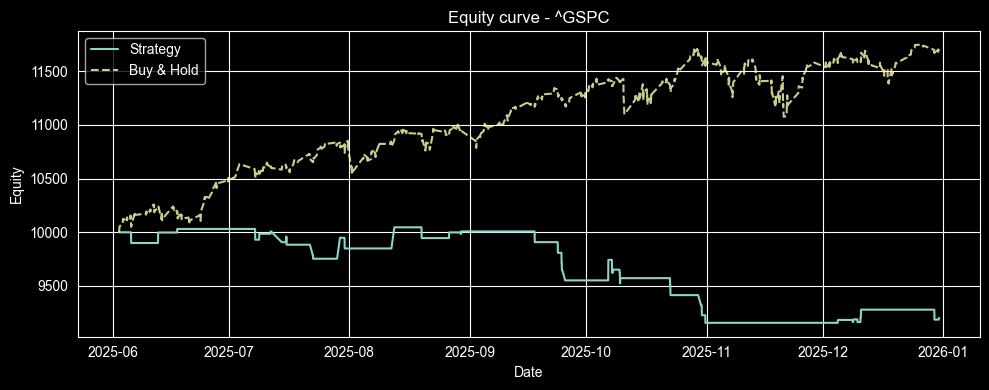


=== Running backtest for ^NDX ===

Signal counts for ^NDX:
Signal
0    923
1     92
Name: count, dtype: int64

Exit breakdown for ^NDX:
  All trades       :   46 trades, avg holding   0.46 days
  stop          :   18 trades, avg holding   0.62 days
  tp            :    6 trades, avg holding   1.19 days
  trend_exit    :   22 trades, avg holding   0.13 days


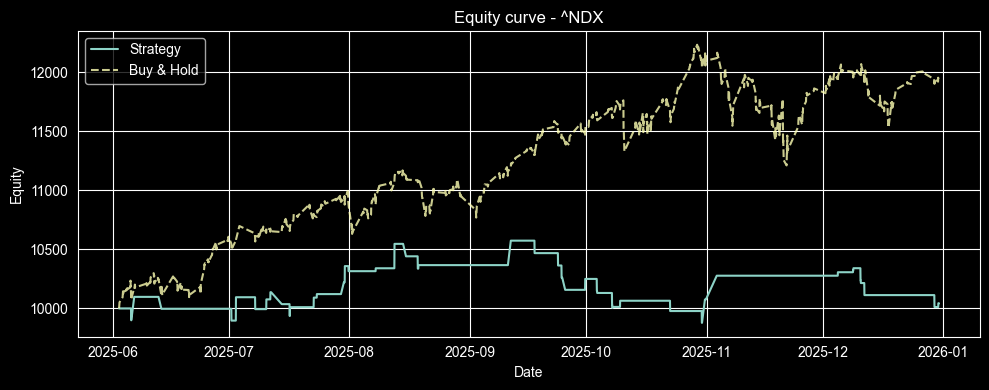


=== Running backtest for ^FTSE ===

Signal counts for ^FTSE:
Signal
0    1219
1     114
Name: count, dtype: int64

Exit breakdown for ^FTSE:
  All trades       :   48 trades, avg holding   0.68 days
  tp            :   12 trades, avg holding   1.12 days
  trend_exit    :   22 trades, avg holding   0.38 days
  stop          :   14 trades, avg holding   0.76 days


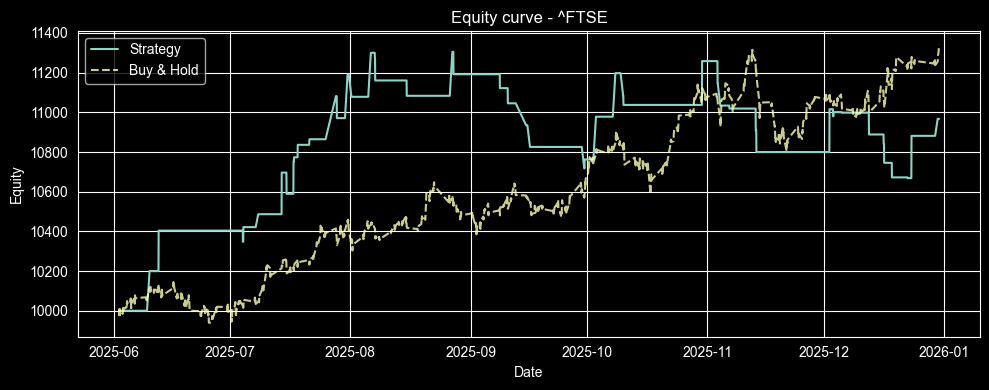


=== Running backtest for EURUSD=X ===

Signal counts for EURUSD=X:
Signal
 0    3195
 1     228
-1     175
Name: count, dtype: int64

Exit breakdown for EURUSD=X:
  All trades       :  187 trades, avg holding   0.15 days
  stop          :   62 trades, avg holding   0.15 days
  tp            :   41 trades, avg holding   0.29 days
  trend_exit    :   84 trades, avg holding   0.07 days


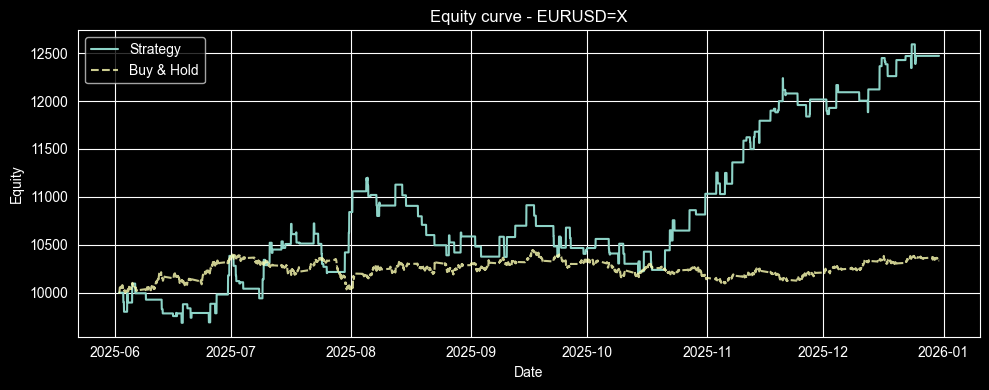


=== Backtest statistics for PORTFOLIO_EQUAL_WEIGHT ===
start_equity        : 10000.0000
end_equity          : 12472.0924
total_return_pct    :    24.72%
max_drawdown_pct    :    -8.94%
num_trades          : 325.0000
win_rate_pct        :    43.69%
avg_win             : 122.2960
avg_loss            : -82.9494
profit_factor       :   1.1828
sharpe_ratio        :   1.6865


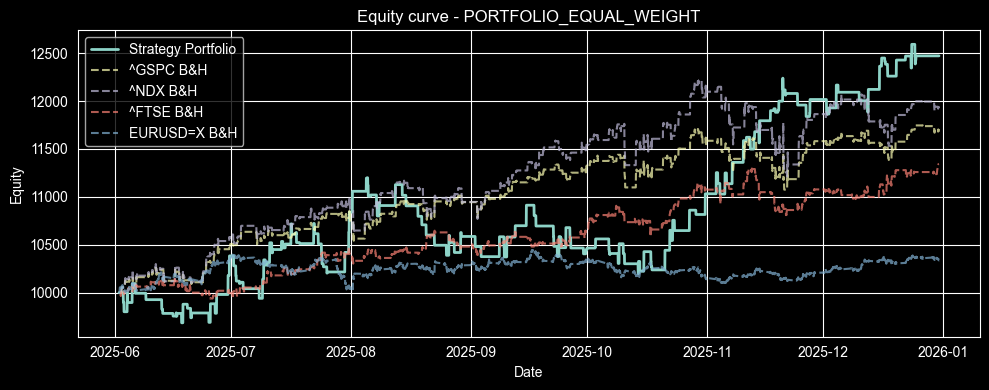


=== Backtest statistics for ^GSPC ===
start_equity        : 10000.0000
end_equity          : 9201.9449
total_return_pct    :    -7.98%
max_drawdown_pct    :    -8.86%
num_trades          :  44.0000
win_rate_pct        :    40.91%
avg_win             :  65.6570
avg_loss            : -76.1492
profit_factor       :   0.5969
sharpe_ratio        :  -3.4221

=== Backtest statistics for ^NDX ===
start_equity        : 10000.0000
end_equity          : 10042.8863
total_return_pct    :     0.43%
max_drawdown_pct    :    -6.58%
num_trades          :  46.0000
win_rate_pct        :    47.83%
avg_win             :  94.4980
avg_loss            : -84.8362
profit_factor       :   1.0211
sharpe_ratio        :   0.2338

=== Backtest statistics for ^FTSE ===
start_equity        : 10000.0000
end_equity          : 10967.0694
total_return_pct    :     9.67%
max_drawdown_pct    :    -5.63%
num_trades          :  48.0000
win_rate_pct        :    43.75%
avg_win             : 149.7260
avg_loss            : -80.6

In [2]:
if __name__ == "__main__":

    name = "trend_pullback_v1" #"trend_pullback_v1" "breakout_v1"
    run_fn, ParamsCls = STRATEGIES[name]

    params_cash = ParamsCls(
        entry_mode="shallow_pullback",
        equity_mode="cash",
        exit_mode="fixed_rr",
        tp_atr_mult=2,
        risk_per_trade=0.01,
    )

    results_cash = run_fn(
        params=params_cash,
        start="2025-6-01",
        end=None,
        interval="1h",
        plot=True,
        portfolio=True,
        show_benchmark=True,
    )


In [4]:
 # %load_ext autoreload
# %autoreload 2
#
# from trading_system.system_development.strategies.breakout_v1.config import StrategyParams
# from trading_system.system_development.strategies.breakout_v1.run_backtest import run_backtest_for_default_universe
#
#
# params = StrategyParams(
#     donchian_lookback=20,
#     vol_lookback=50,
#     low_vol_mult=0.8,
#     risk_per_trade=0.01,
#     equity_mode="mtm",
#     long_only=True,
# )
#
# results = run_backtest_for_default_universe(
#     params=params,
#     start="2024-01-01",
#     end=None,
#     interval="4h",
#     plot=True,
#     portfolio=True,
#     show_benchmark=True,
# )

# Debug

In [ ]:
from system_development.engine.data_loader import download_price_data
from system_development.strategies.trend_pullback_v1.config import DEFAULT_PARAMS
from system_development.strategies.trend_pullback_v1.rules import prepare_dataframe

symbol = "^GSPC"

raw = download_price_data(symbol, start="2015-01-01", interval="1d")
df = prepare_dataframe(raw, DEFAULT_PARAMS)

df["Signal"].value_counts()
df[["Close", "EMA_Fast", "EMA_Slow", "RSI", "ADX", "Trend", "Signal"]].tail()
